In [33]:
# Load some important libraries we'll be working with

import pandas as pd
from pandas import json_normalize
import requests

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Let's dive into the FIFA World Cup final
match_id = 8658

# Load the list of events for the match we've chosen
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/'+str(match_id)+'.json')
events = events.json()

# Let's transform our JSON object to Pandas DataFrame
events = json_normalize(events, sep = "_")

# Excluding (...) for large number of columns
pd.set_option("display.max.columns", None)

events.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
0,47638847-fd43-4656-b49c-cff64e5cfc0a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,771,France,1,Regular Play,771,France,442.0,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0c04305d-5615-4520-9be5-7c232829954b,2,1,00:00:00.000,0,0,1,1.412,35,Starting XI,771,France,1,Regular Play,785,Croatia,433.0,"[{'player': {'id': 3444, 'name': 'Danijel Suba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c5e17439-efe2-480b-9cff-1600998674d7,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,771,France,1,Regular Play,771,France,NaN,NaN,[7e1460eb-c572-4059-8cd4-cec4857f818d],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7e1460eb-c572-4059-8cd4-cec4857f818d,4,1,00:00:00.000,0,0,1,0.000,18,Half Start,771,France,1,Regular Play,785,Croatia,NaN,NaN,[c5e17439-efe2-480b-9cff-1600998674d7],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,918ffaaf-3cee-41e5-87e2-4bcc8d43a859,5,1,00:00:00.400,0,0,2,1.159,30,Pass,785,Croatia,9,From Kick Off,785,Croatia,NaN,NaN,[329cb470-9b7a-4b19-b8d2-50fa902295af],"[61.0, 41.0]",5472.0,M

In [36]:
#Filtering shots made by France & Croatia

france_shots = events.loc[(events['type_name'] == 'Shot') & (events['team_name'] == "France")]
croatia_shots = events.loc[(events['type_name'] == 'Shot') & (events['team_name'] == "Croatia")]

In [37]:
france_shots.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
1052,ad19fde7-da37-4430-b1a3-2293ae7c4fff,1053,1,00:37:56.787,37,56,73,0.533,16,Shot,771,France,5,Other,771,France,NaN,NaN,[826b19b4-3677-4476-bbd3-fededea1d302],"[108.0, 40.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760000,"[120.0, 37.6, 0.1]",NaN,93.0,Normal,88.0,Penalty,97.0,Goal,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1404,474afda2-d8c7-4254-93bf-895d9c440ccf,1405,2,00:01:10.027,46,10,95,1.653,16,Shot,771,France,8,From Keeper,771,France,NaN,NaN,[a7d5f212-baf8-4257-91a2-ad66d50a4ebe],"[95.0, 45.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028645,"[119.0, 38.9, 0.5]",3fc7f963-3898-41a2-8c66-6134488a6ab0,93.0,Normal,87.0,Open Play,100.0,Saved,38.0,Left Foot,"[{'location': [98.0, 45.0], 'player': {'id': 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647,cc69d1e5-36bf-4522-ae6d-fa1459dfb877,1648,2,00:06:35.947,51,35,107,0.280,16,Shot,771,France,1,Regular Play,771,France,NaN,NaN,[103cc7b6-f2e5-4648-a1d5-202973049731],"[115.0, 55.0]",3009.0,Kylian Mbappé Lottin,12.0,Right Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098792,"[118.0, 39.9, 0.6]",0deaee58-85a1-43f7-9cdf-2caadd3edc2b,93.0,Normal,87.0,Open Play,100.0,Saved,40.0,Right Foot,"[{'location': [117.0, 52.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1858,73b228b2-3719-4d37-93ba-fe167cce9ebd,1859,2,00:13:32.347,58,32,120,0.773,16,Shot,771,France,4,From Throw In,771,France,NaN,NaN,"[13ed6cdc-6e1a-42fc-8624-d69372b94272, 8923239...","[99.0, 41.0]",20004.0,Paul Pogba,9.0,Right Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [38]:
# Load the list of matches for the competition and season we've chosen
# Let's explore last FIFA World Cup

competition_id = 43
season_id = 3

matches = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/'+str(competition_id)+'/'+str(season_id)+'.json')
matches = matches.json()

matches[0]

{'match_id': 7581,
 'match_date': '2018-07-01',
 'kick_off': '20:00:00.000',
 'competition': {'competition_id': 43,
  'country_name': 'International',
  'competition_name': 'FIFA World Cup'},
 'season': {'season_id': 3, 'season_name': '2018'},
 'home_team': {'home_team_id': 785,
  'home_team_name': 'Croatia',
  'home_team_gender': 'male',
  'home_team_group': None,
  'country': {'id': 56, 'name': 'Croatia'},
  'managers': [{'id': 307,
    'name': 'Zlatko Dalić',
    'nickname': None,
    'dob': None,
    'country': {'id': 56, 'name': 'Croatia'}}]},
 'away_team': {'away_team_id': 776,
  'away_team_name': 'Denmark',
  'away_team_gender': 'male',
  'away_team_group': None,
  'country': {'id': 61, 'name': 'Denmark'},
  'managers': [{'id': 641,
    'name': 'Åge Fridtjof Hareide',
    'nickname': 'Åge Hareide',
    'dob': None,
    'country': {'id': 171, 'name': 'Norway'}}]},
 'home_score': 1,
 'away_score': 1,
 'match_status': 'available',
 'match_status_360': 'unscheduled',
 'last_updated'

In [39]:
# Let's find the names of teams, so we could use them automatically in chart title

for i in matches:
    if i['match_id'] == match_id:
        home_team = i['home_team']['home_team_name']
        away_team = i['away_team']['away_team_name']
        break

In [40]:
#df['cum_away_shots'] = df['away_shots'].cumsum()
#df["A"] = pd.to_numeric(df["A"], downcast="float")

#Converting from string to float
france_shots['shot_statsbomb_xg'] = pd.to_numeric(france_shots['shot_statsbomb_xg'], downcast="float")
croatia_shots['shot_statsbomb_xg'] = pd.to_numeric(croatia_shots['shot_statsbomb_xg'], downcast="float")

#Converting from string to int
france_shots.loc['minute'] = pd.to_numeric(france_shots['minute'], downcast="integer")
croatia_shots['minute'] = pd.to_numeric(croatia_shots['minute'], downcast="integer")

#Getting a column with cumulative result
france_shots['cumsum_xg'] = france_shots['shot_statsbomb_xg'].cumsum()
croatia_shots['cumsum_xg'] = croatia_shots['shot_statsbomb_xg'].cumsum()

In [41]:
france_shots.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,cumsum_xg
1052,ad19fde7-da37-4430-b1a3-2293ae7c4fff,1053.0,1.0,00:37:56.787,37.0,56.0,73.0,0.533,16.0,Shot,771.0,France,5.0,Other,771.0,France,NaN,NaN,[826b19b4-3677-4476-bbd3-fededea1d302],"[108.0, 40.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760000,"[120.0, 37.6, 0.1]",NaN,93.0,Normal,88.0,Penalty,97.0,Goal,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760000
1404,474afda2-d8c7-4254-93bf-895d9c440ccf,1405.0,2.0,00:01:10.027,46.0,10.0,95.0,1.653,16.0,Shot,771.0,France,8.0,From Keeper,771.0,France,NaN,NaN,[a7d5f212-baf8-4257-91a2-ad66d50a4ebe],"[95.0, 45.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028645,"[119.0, 38.9, 0.5]",3fc7f963-3898-41a2-8c66-6134488a6ab0,93.0,Normal,87.0,Open Play,100.0,Saved,38.0,Left Foot,"[{'location': [98.0, 45.0], 'player': {'id': 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.788644
1647,cc69d1e5-36bf-4522-ae6d-fa1459dfb877,1648.0,2.0,00:06:35.947,51.0,35.0,107.0,0.280,16.0,Shot,771.0,France,1.0,Regular Play,771.0,France,NaN,NaN,[103cc7b6-f2e5-4648-a1d5-202973049731],"[115.0, 55.0]",3009.0,Kylian Mbappé Lottin,12.0,Right Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098792,"[118.0, 39.9, 0.6]",0deaee58-85a1-43f7-9cdf-2caadd3edc2b,93.0,Normal,87.0,Open Play,100.0,Saved,40.0,Right Foot,"[{'location': [117.0, 52.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887436
1858,73b228b2-3719-4d37-93ba-fe167cce9ebd,1859.0,2.0,00:13:32.347,58.0,32.0,120.0,0.773,16.0,Shot,771.0,France,4.0,From Throw In,771.0,France,NaN,NaN,"[13ed6cdc-6e1a-42fc-8624-d69372b94272, 892323

In [42]:
croatia_shots.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,cumsum_xg
723,cfdb23f5-0247-4f10-9641-8ac06824722f,724,1,00:20:51.227,20,51,43,1.013,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[d8e239af-b66d-475c-a719-b46c418d8a49],"[112.0, 49.0]",5468.0,Domagoj Vida,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041081,"[119.0, 36.6, 5.0]",f66011e2-0cbf-46b9-b845-4d759c0c34ae,93.0,Normal,87.0,Open Play,98.0,Off T,37.0,Head,"[{'location': [120.0, 42.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041081
792,2776f49c-73a8-4185-bcce-9cbef244cf3c,793,1,00:23:34.907,23,34,49,2.053,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[c0201b3a-c444-4179-a42a-324d928d7a38],"[108.0, 29.0]",5470.0,Ivan Rakitić,15.0,Left Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066235,"[120.0, 47.5, 6.4]",efc066fd-75c1-4744-b7fc-070cf6c8c293,95.0,Volley,87.0,Open Play,98.0,Off T,38.0,Left Foot,"[{'location': [120.0, 40.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107316
910,dd524196-386d-4759-b40b-e920cc77b059,911,1,00:27:53.880,27,53,58,0.587,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[c0291f7e-a0c0-43c9-8bd3-a60120fdc946],"[105.0, 32.0]",5474.0,Ivan Perišić,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063829,"[120.0, 43.6, 0.8]",239d4230-e8d1-4e17-b9dd-b7f57faf3ecb,91.0,Half Volley,87.0,Open Play,97.0,Goal,38.0,Left Foot,"[{'location': [120.0, 40.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.171145
1076,b99d698f-5891-402b-b5cf-33ca81e1554f,1077,1,00:39:25.267,39,25,74,1.000,16,Shot,785,Croatia,1,Regular Play,785,Croatia,NaN,NaN,[b365fe25-80c3-481c-81cb-c7de657e9d61],"[108.0, 41.0

In [43]:
# Creating a df with the data we need only
home_df = france_shots[['minute', 'cumsum_xg']]
away_df = croatia_shots[['minute', 'cumsum_xg']]

# Creating objects for home/away minutes and xG
# Setting the 1st elements to zero, so the step chart start from zero position in both teams
h_min = [0]
a_min = [0]
h_xg = [0.0]
a_xg = [0.0]

# Adding to the lists above all the minutes and xG for home team
for x in range(len(home_df['minute'])):
    h_xg.append(home_df['cumsum_xg'].iloc[x])
    h_min.append(home_df['minute'].iloc[x])

# Adding to the lists above all the minutes and xG for away team
for x in range(len(away_df['minute'])):
    a_xg.append(away_df['cumsum_xg'].iloc[x])
    a_min.append(away_df['minute'].iloc[x])


In [44]:
a_xg, a_min

([0.0,
  0.041080866,
  0.10731596,
  0.17114486,
  0.2681287,
  0.35120746,
  0.37032282,
  0.4928385,
  0.55978405,
  0.57515895,
  0.5849281,
  0.631384,
  1.1888003,
  1.2004043,
  1.2419283,
  1.2536991],
 [0, 20, 23, 27, 39, 42, 42, 45, 47, 47, 49, 63, 68, 75, 77, 88])

Text(0.5, 1.0, 'France (white) vs Croatia (red)')

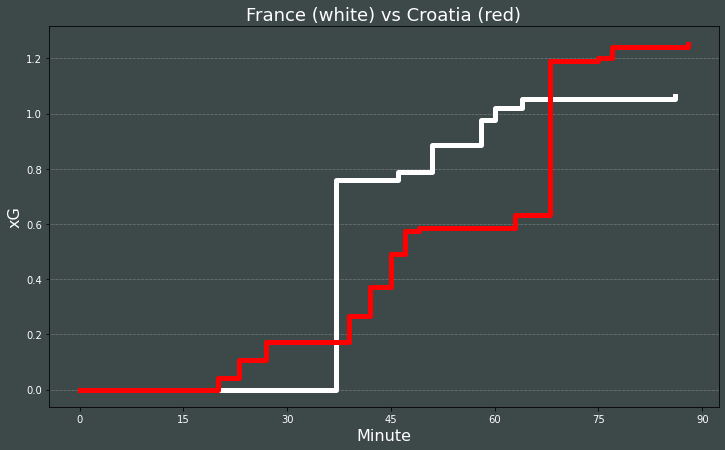

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

plt.xticks([0,15,30,45,60,75,90], color='white')
plt.yticks(color='white')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)

'''
#plot the step graphs
ax.step(x=data_home['minute'],y=data_home['cumsum_xg'],color='white',linewidth=5)
ax.step(x=data_away['minute'],y=data_away['cumsum_xg'],color='red',linewidth=5)
'''

# Passing our lists to step object to plot the chart
ax.step(x=h_min,y=h_xg,color='white',linewidth=5, where='post')
ax.step(x=a_min,y=a_xg,color='red',linewidth=5, where='post') #check the where option

plt.title(home_team + ' (white) vs ' + away_team + ' (red)', color='white', fontsize=18)

#plt.step(h_min, h_xg)
#plt.step(a_min, a_xg)